<a href="https://colab.research.google.com/github/haotran0813/PortfolioProjects/blob/main/Final_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction:**

Dataset containing ~130k wine reviews published to WineEnthusiast. The dataset consists of 22387 records across 14 fields. 

We use four fields in this analysis, as follows"

id (int64), 
country (object), 
points (int64),
price (float64).

***Business questions: ***

Answer if there’s a significant difference in price of wine from the US and France between 90 points and 95 points. 


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
from scipy import stats
import seaborn as sns
    
df = pd.read_csv('/content/gdrive/My Drive/Thinkful/wineclean.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     9704 non-null   int64 
 1   country                9704 non-null   object
 2   description            9704 non-null   object
 3   designation            6906 non-null   object
 4   points                 9704 non-null   int64 
 5   price                  9704 non-null   int64 
 6   province               9704 non-null   object
 7   region_1               9677 non-null   object
 8   region_2               6947 non-null   object
 9   taster_name            7975 non-null   object
 10  taster_twitter_handle  7665 non-null   object
 11  title                  9704 non-null   object
 12  variety                9704 non-null   object
 13  winery                 9704 non-null   object
dtypes: int64(3), object(11)
memory usage: 1.0+ MB


In [ ]:
df.isnull()

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,False,False,False,False,False,False,False,False,True,True,True,False,False,False
1,False,False,False,False,False,False,False,False,True,True,True,False,False,False
2,False,False,False,True,False,False,False,False,False,True,True,False,False,False
3,False,False,False,False,False,False,False,False,True,True,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9699,False,False,False,False,False,False,False,False,True,False,False,False,False,False
9700,False,False,False,True,False,False,False,False,False,False,False,False,False,False
9701,False,False,False,False,False,False,False,False,True,False,False,False,False,False
9702,False,False,False,True,False,False,False,False,True,False,False,False,False,False


In [ ]:
df.fillna('To be determined')

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,138,France,Mid-gold color. Very mineral driven with subtl...,CrustacÃ©s,90,10,Alsace,Alsace,To be determined,To be determined,To be determined,Dopff & Irion 2008 CrustacÃ©s White (Alsace),Alsace white blend,Dopff & Irion
1,139,France,"Beautiful deep gold color. Intense, concentrat...",CuvÃ©e JerÃ©my SÃ©lection de Grains Nobles,90,112,Alsace,Alsace,To be determined,To be determined,To be determined,Kuentz-Bas 2007 CuvÃ©e JerÃ©my SÃ©lection de G...,Pinot Gris,Kuentz-Bas
2,142,US,"A beautiful wine, sleek, crisp and ultra-dry, ...",To be determined,90,17,California,Santa Lucia Highlands,Central Coast,To be determined,To be determined,Banyan 2007 Riesling (Santa Lucia Highlands),Riesling,Banyan
3,143,France,"Rich gold in color. Broad, layered aromas of v...",Hunawihr Clos Windsbuhl,90,84,Alsace,Alsace,To be determined,To be determined,To be determined,Domaine Zind-Humbrecht 2007 Hunawihr Clos Wind...,Pinot Gris,Domaine Zind-Humbrecht
4,198,US,"This is a soft, well-crafted wine from the eas...",Four Soil MÃ©lange,90,60,California,Napa Valley,Napa,Virginie Boone,@vboone,Sequum 2013 Four Soil MÃ©lange Cabernet Sauvig...,Cabernet Sauvignon,Sequum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9699,129965,France,"While it's rich, this beautiful dry wine also ...",Seppi Landmann VallÃ©e Noble,90,28,Alsace,Alsace,To be determined,Roger Voss,@vossroger,Domaine RieflÃ©-Landmann 2013 Seppi Landmann V...,Pinot Gris,Domaine RieflÃ©-Landmann
9700,129967,US,Citation is given as much as a decade of bottl...,To be determined,90,75,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwineÂ,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
9701,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30,Alsace,Alsace,To be determined,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,GewÃ¼rztraminer,Domaine Gresser
9702,129969,France,"A dry style of Pinot Gris, this is crisp with ...",To be determined,90,32,Alsace,Alsace,To be determined,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


Hypothesis 1: there is no significant difference in price between wine from the US and France at the rating of 90 points.

In [ ]:

us_options = (df['country'] == 'US') & (df['points'] == 90)
us_90 = df.iloc[us_options.values,[0,1,4,5]]
us_90

,id,country,points,price
2,142,US,90,17
4,198,US,90,60
5,199,US,90,28
6,204,US,90,30
7,205,US,90,25
...,...,...,...,...
9693,129945,US,90,20
9694,129949,US,90,35
9695,129950,US,90,35
9697,129952,US,90,22


In [ ]:
fr_options = (df['country'] == 'France') & (df['points'] == 90)
fr_90 = df.iloc[fr_options.values,[0,1,4,5]]
fr_90

,id,country,points,price
0,138,France,90,10
1,139,France,90,112
3,143,France,90,84
10,209,France,90,16
11,211,France,90,32
...,...,...,...,...
9698,129959,France,90,57
9699,129965,France,90,28
9701,129968,France,90,30
9702,129969,France,90,32


In [ ]:
# Run an independent-samples t-test
stats.ttest_ind(us_90['price'], fr_90['price'])

Ttest_indResult(statistic=5.276122567907515, pvalue=1.3510928841833698e-07)

The p-value is extremly small, implying that this a real difference. Wine from US and France with 90 points rating are different in price.
Hypothesis is rejected.

Hypothesis 2: there is no significant difference in price between wine from the US and France at the rating of 95 points.

In [ ]:
us_options_1 =(df['country'] == 'US') &(df['points'] == 95)
us_95 = df.iloc[us_options_1.values,[0,1,4,5]]
us_95

,id,country,points,price
18,362,US,95,200
20,364,US,95,48
126,1579,US,95,56
130,1583,US,95,60
131,1584,US,95,75
...,...,...,...,...
9438,127581,US,95,85
9439,127582,US,95,125
9527,128682,US,95,38
9528,128683,US,95,90


In [ ]:
fr_options_1 = (df['country'] == "France") & (df['points'] == 95)


In [ ]:
fr_95 = df.iloc[fr_options_1.values,[0,1,4,5]]
fr_95

,id,country,points,price
16,357,France,95,350
17,359,France,95,110
19,363,France,95,380
127,1580,France,95,89
128,1581,France,95,163
...,...,...,...,...
9203,124430,France,95,850
9206,124433,France,95,120
9207,124434,France,95,500
9208,124435,France,95,450


In [ ]:
# Run an indepentent-samples t-test
stats.ttest_ind(us_95['price'], fr_95['price'])

Ttest_indResult(statistic=-14.742008458285664, pvalue=1.6853912654343998e-44)

The p-value is extremly small, implying that this a real difference. Wine from US and France with 95 points rating are different in price.
Hypothesis is rejected.

In [ ]:
us_90[['price']].describe()


,price
count,6684.000000
mean,37.905895
std,21.620092
min,8.000000
25%,24.000000
50%,34.000000
75%,45.000000
max,350.000000


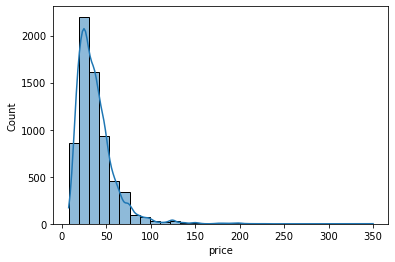

In [ ]:
# US wine 90 points price
ax = sns.histplot(us_90['price'], bins = 30, kde = True)

In [ ]:

fr_90[['price']].describe()


,price
count,2056.000000
mean,35.007296
std,22.310733
min,10.000000
25%,20.000000
50%,28.000000
75%,43.000000
max,290.000000


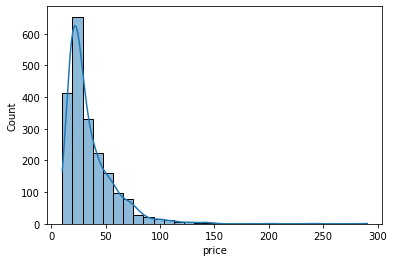

In [ ]:
# France wine 90 points price
ax = sns.histplot(fr_90['price'], bins = 30, kde = True)

In [ ]:
us_95[['price']].describe()

,price
count,640.000000
mean,76.742188
std,43.975887
min,20.000000
25%,50.000000
50%,65.000000
75%,86.000000
max,450.000000


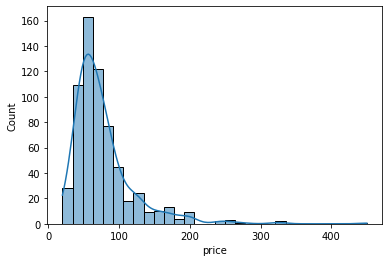

In [ ]:
# US wine 95 points price
ax = sns.histplot(us_95['price'], bins = 30, kde =True)

In [ ]:
fr_95[['price']].describe()

,price
count,324.000000
mean,168.904321
std,145.646419
min,20.000000
25%,66.000000
50%,115.000000
75%,227.500000
max,973.000000


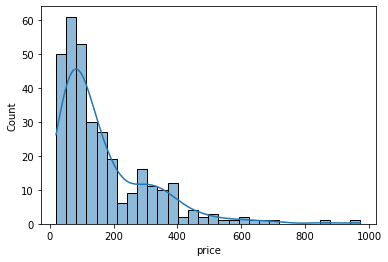

In [ ]:
# France wine 95 points price
ax = sns.histplot(fr_95['price'], bins = 30, kde= True)

Conclusions:

Wine from US and France with 90 points rating are different in price.

Wine from US and France with 95 points rating are different in price.

Recommendations:
1. France wine does cost more than US wine in general. What makes it special is important to advertise to the clients. We should dig into specific type of grapes/regions to find out the most unique and delicous wine that we have to to represent our company. An average bottle of US and France wine with 90 points rating is around $35-37. 
We could consider to scale our price a little more affordable for the consumers but still at the same rating point.
2. We could give clients who buy our wine with a large amount a little discount to keep return clients. 

Next Steps:

Collecting new data to analyze the most popular grapes from different regions to obtain the new variety of wine, make us unique in the market. 
Natural wine is such a thing in the market. That could create a new market for us. 